In [ ]:
!pip install imblearn

In [ ]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# drop missing values
df.dropna(inplace=True)

# drop customerID
df.drop('customerID', axis=1, inplace=True)

In [ ]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [ ]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# check missing value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

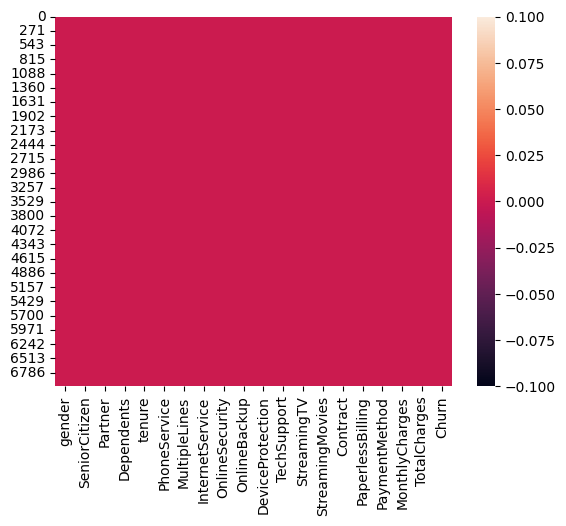

In [ ]:
# heatmap for missing value
sns.heatmap(df.isnull())

Text(0, 0.5, 'Nombre de clients')

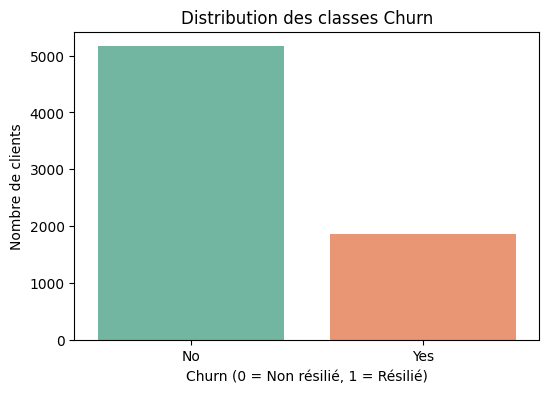

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')

# Ajouter des labels et un titre
plt.title('Distribution des classes Churn')
plt.xlabel('Churn (0 = Non résilié, 1 = Résilié)')
plt.ylabel('Nombre de clients')

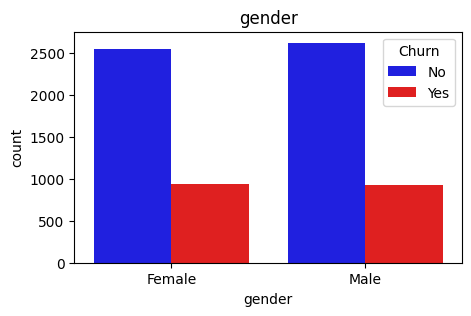

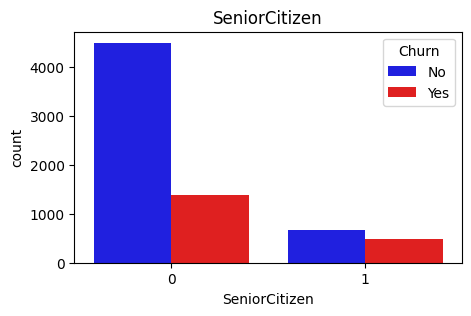

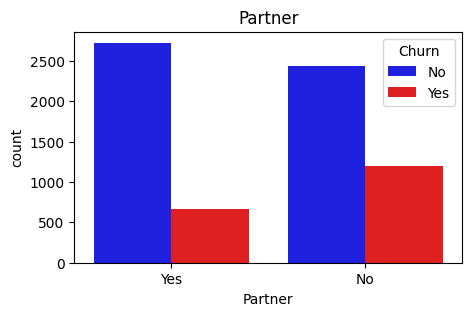

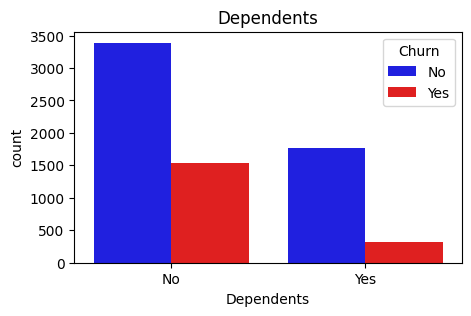

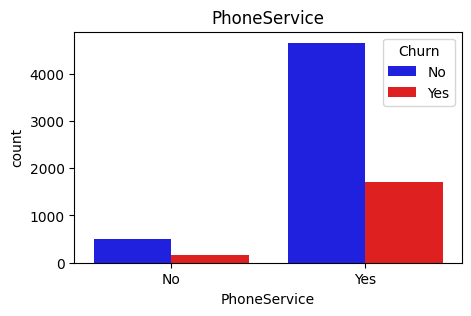

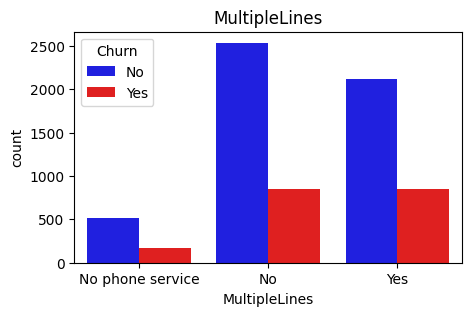

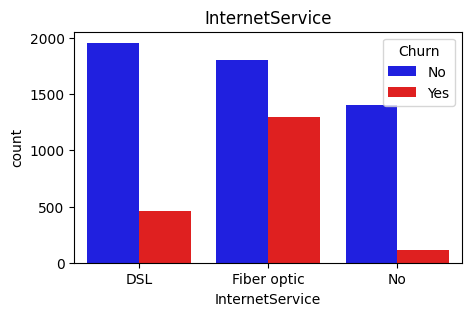

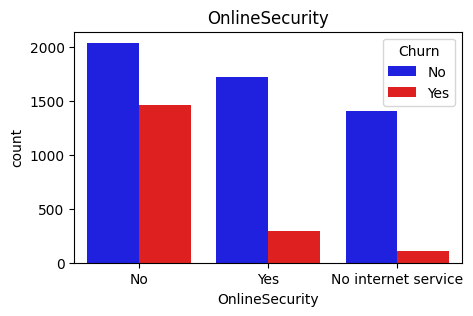

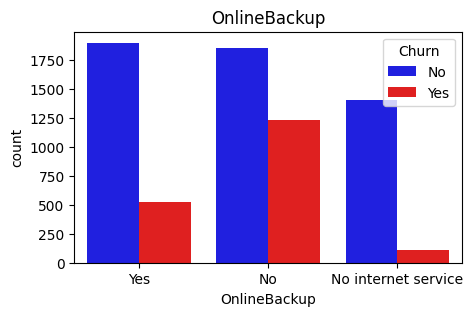

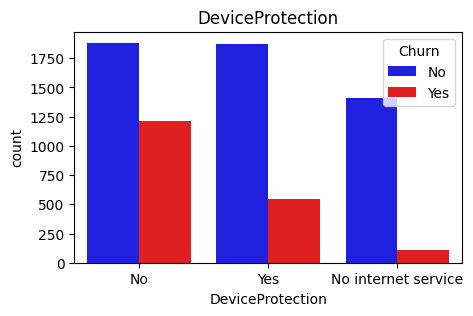

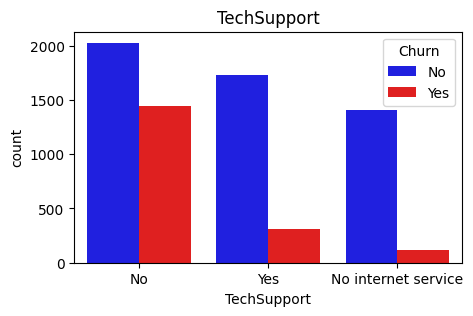

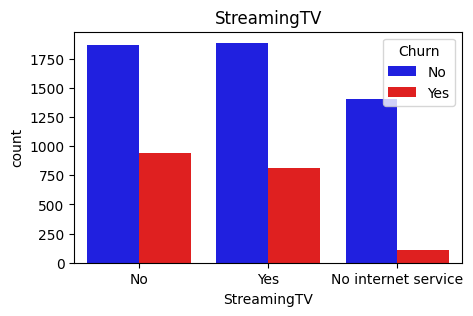

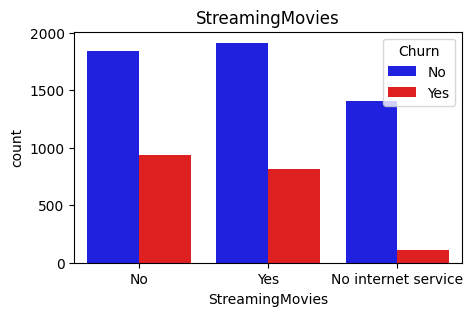

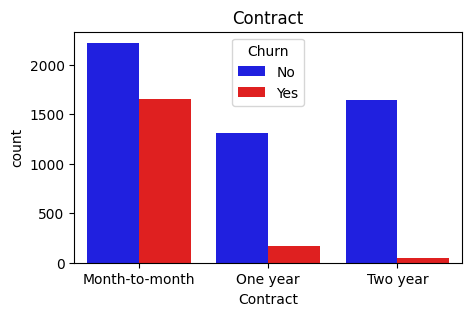

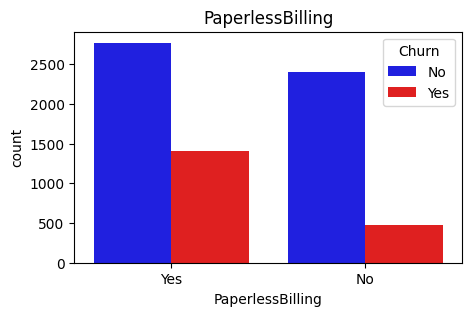

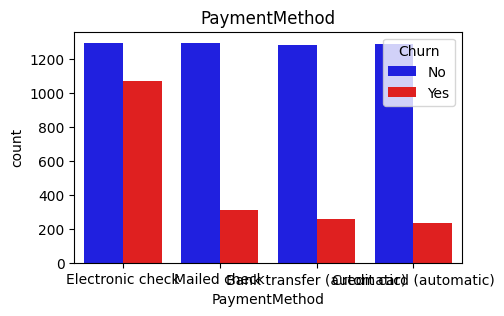

In [ ]:

# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()


<h3 style="font-familyNumerical Data :)</h3>


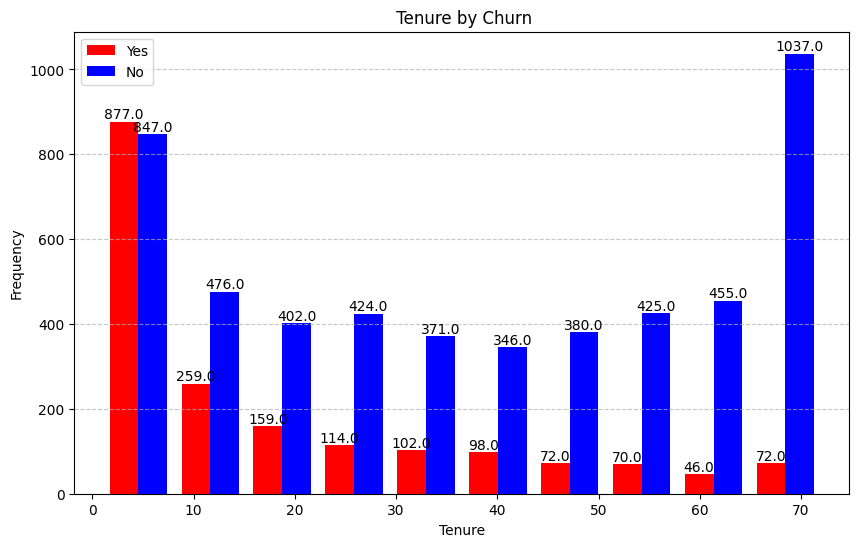

In [ ]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


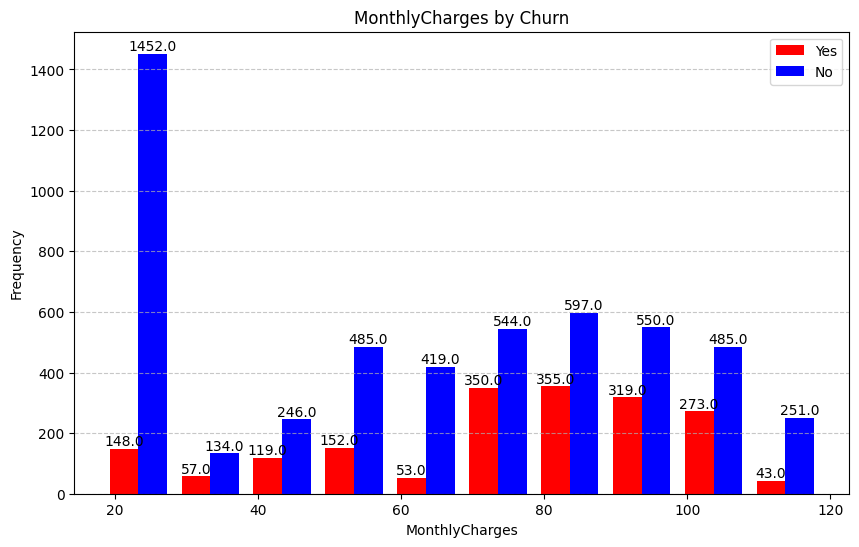

In [ ]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


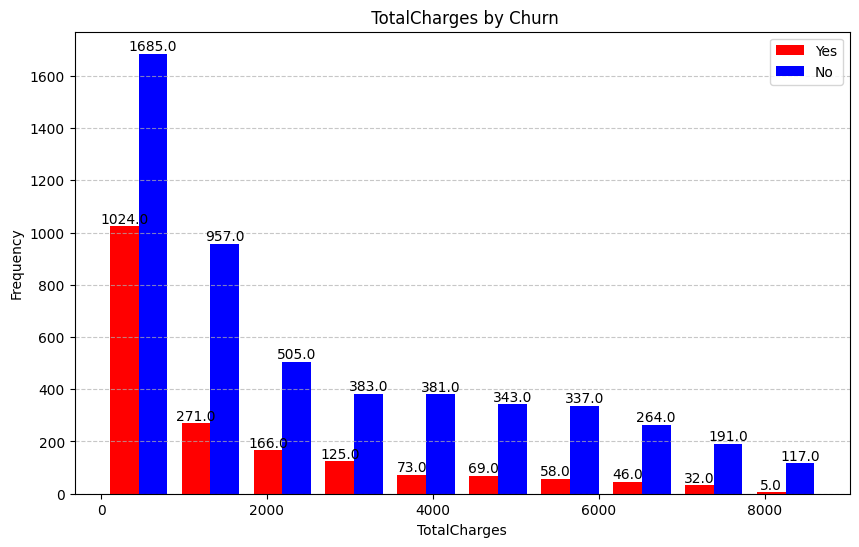

In [ ]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


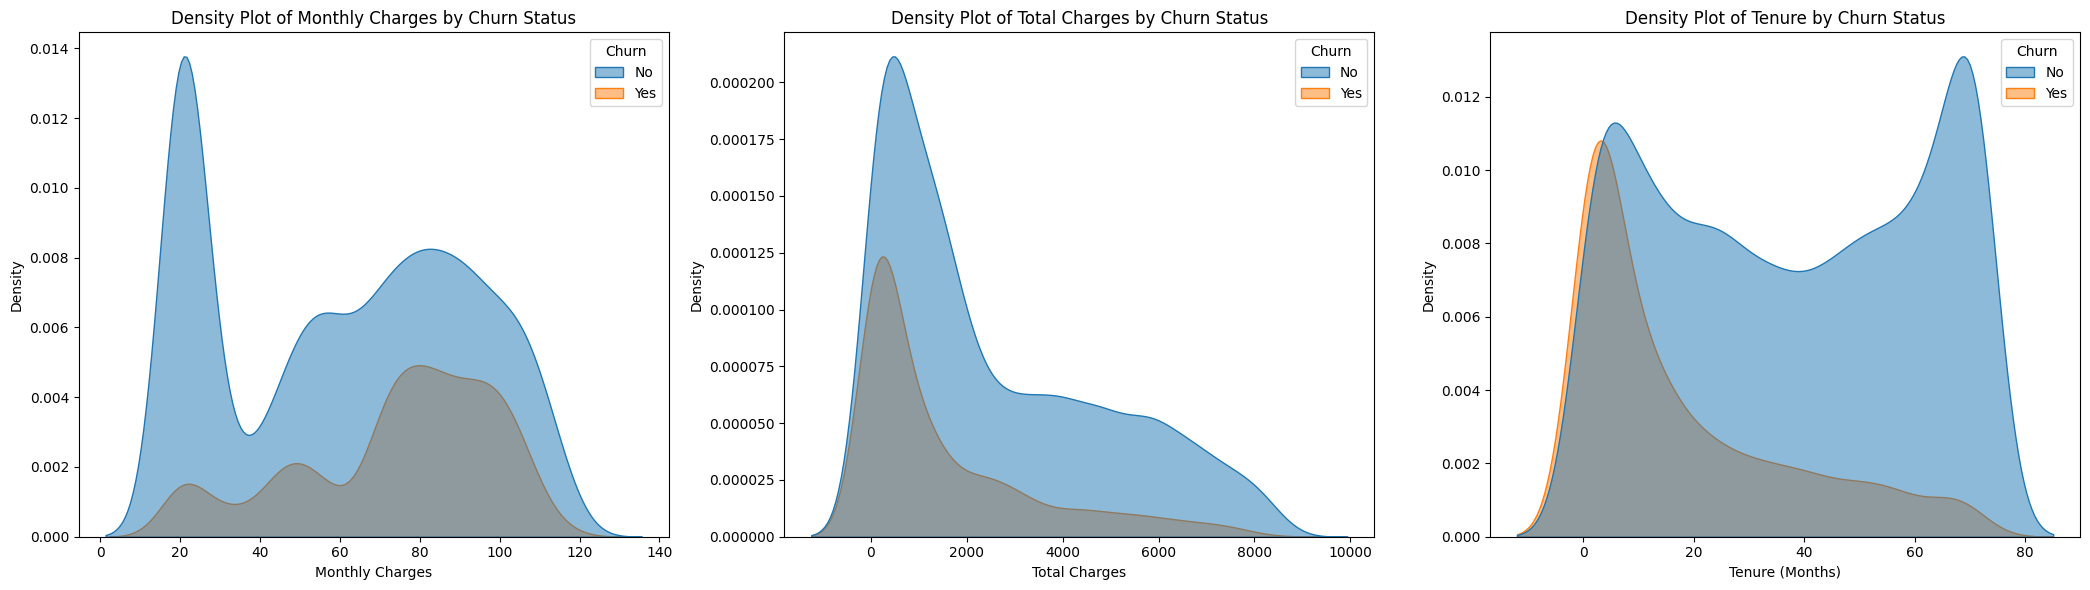

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

# Plot for Tenure
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, alpha=0.5, ax=axes[2])
axes[2].set_title('Density Plot of Tenure by Churn Status')
axes[2].set_xlabel('Tenure (Months)')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()



Encode The Data By OneHotEncoder


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:

df.drop('Churn_No', axis=1, inplace=True)

In [ ]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [ ]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),
    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_f1 = 0.0  # Changer la métrique pour F1-score si nécessaire

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append model performance metrics to the list
    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3),
        'F1 Score': round(f1, 3)
    })

    # Print performance metrics
    print(f"Model: {name}")
    print(f"Accuracy: {round(accuracy * 100, 2)}%")
    print(f"Recall: {round(recall * 100, 2)}%")
    print(f"Precision: {round(precision * 100, 2)}%")
    print(f"F1 Score: {round(f1 * 100, 2)}%")
    print()

    # Check if the current model has the best F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_model = pipeline

# Convert results to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Retrieve the overall best model
print("Best Model:")
print(f"Test F1 Score: {round(best_f1 * 100, 2)}%")
print("Model Pipeline:", best_model)

# Display the performance of all models
print("\nSummary of Model Performance:")
print(scores_df)


Model: Random Forest
Accuracy: 81.09%
Recall: 56.65%
Precision: 67.41%
F1 Score: 61.56%

Model: Gradient Boosting
Accuracy: 79.89%
Recall: 46.54%
Precision: 68.09%
F1 Score: 55.29%

Model: Support Vector Machine
Accuracy: 75.34%
Recall: 78.99%
Precision: 52.57%
F1 Score: 63.12%

Model: Logistic Regression
Accuracy: 75.84%
Recall: 82.71%
Precision: 53.07%
F1 Score: 64.66%

Model: K-Nearest Neighbors
Accuracy: 76.76%
Recall: 55.59%
Precision: 56.64%
F1 Score: 56.11%

Model: Decision Tree
Accuracy: 77.04%
Recall: 53.72%
Precision: 57.55%
F1 Score: 55.57%

Model: Ada Boost
Accuracy: 81.45%
Recall: 57.98%
Precision: 67.91%
F1 Score: 62.55%

Model: XG Boost
Accuracy: 81.02%
Recall: 56.38%
Precision: 67.3%
F1 Score: 61.36%

Model: Naive Bayes
Accuracy: 70.01%
Recall: 85.64%
Precision: 46.67%
F1 Score: 60.41%

Best Model:
Test F1 Score: 64.66%
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',


Plot Of Accuracy

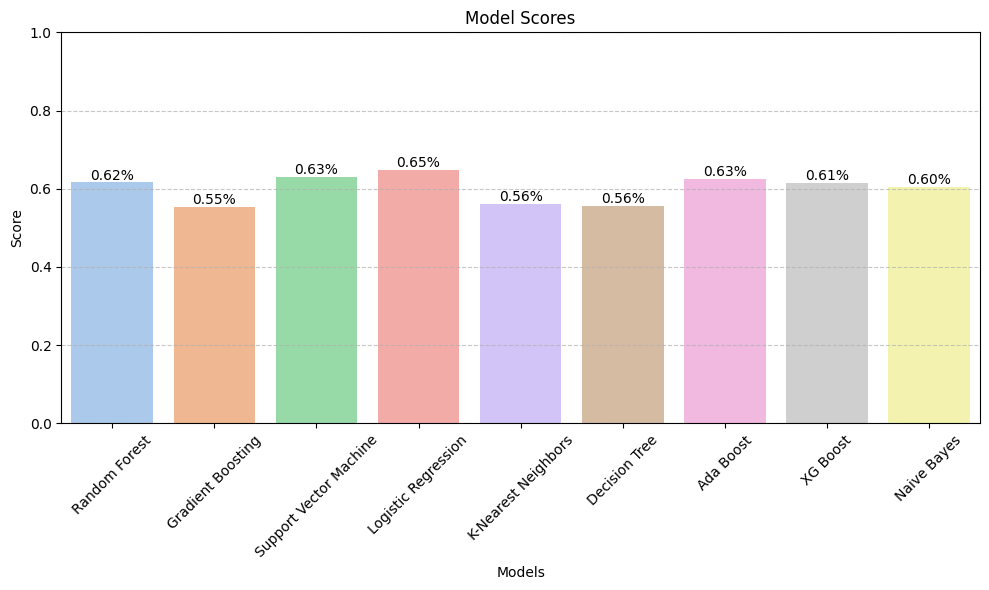

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='F1 Score', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from imblearn.combine import SMOTEENN
import pandas as pd
from scipy.stats import uniform, randint

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling (SMOTEENN) only on the training data
sm = SMOTEENN()
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# List of models and their hyperparameters
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),
    ('SVC', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),
    ('KNN', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),
    ('AdaBoost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),
    ('XGBoost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6),
         'learning_rate': uniform(0.01, 0.2),
         'n_estimators': randint(100, 300),
         'subsample': uniform(0.8, 0.2)}),
    ('Naive Bayes', GaussianNB(), {})
]

# Initialize an empty list to store model scores
model_scores = []

best_model = None
best_f1 = 0.0

# Loop over each model, fit and evaluate
for name, model, param_grid in models:
    if name == 'XGBoost':
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=3, verbose=0, random_state=42, n_jobs=-1)
    elif param_grid:
        search = GridSearchCV(model, param_grid, cv=3, verbose=0)
    else:
        search = model  # No tuning for Naive Bayes

    # Fit the model with resampled data and hyperparameter tuning
    if isinstance(search, (RandomizedSearchCV, GridSearchCV)):
        search.fit(X_train_res, y_train_res)
        best_model_instance = search.best_estimator_
    else:
        best_model_instance = search
        best_model_instance.fit(X_train_res, y_train_res)

    # Make predictions on the test data
    y_pred = best_model_instance.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to model_scores list
    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Recall': round(recall, 3),
        'Precision': round(precision, 3),
        'F1 Score': round(f1, 3)
    })

    # Print model results
    print(f"Model: {name}")
    print(f"Accuracy: {round(accuracy * 100, 2)}%")
    print(f"Recall: {round(recall * 100, 2)}%")
    print(f"Precision: {round(precision * 100, 2)}%")
    print(f"F1 Score: {round(f1 * 100, 2)}%")
    print()

    # Update best model based on F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_model = best_model_instance

# Convert results to DataFrame
scores_df = pd.DataFrame(model_scores)

# Print overall best model
print("Best Model:")
print(f"Test F1 Score: {round(best_f1 * 100, 2)}%")
print("Model Pipeline:", best_model)

# Display performance of all models
print("\nSummary of Model Performance:")
print(scores_df)


Model: Random Forest
Accuracy: 71.93%
Recall: 78.07%
Precision: 48.26%
F1 Score: 59.65%

Model: Gradient Boosting
Accuracy: 70.58%
Recall: 82.89%
Precision: 46.97%
F1 Score: 59.96%

Model: SVC
Accuracy: 71.5%
Recall: 75.13%
Precision: 47.71%
F1 Score: 58.36%

Model: Logistic Regression
Accuracy: 69.08%
Recall: 82.89%
Precision: 45.52%
F1 Score: 58.77%

Model: KNN
Accuracy: 66.88%
Recall: 84.49%
Precision: 43.65%
F1 Score: 57.56%

Model: Decision Tree
Accuracy: 72.28%
Recall: 81.02%
Precision: 48.71%
F1 Score: 60.84%

Model: AdaBoost
Accuracy: 69.23%
Recall: 85.29%
Precision: 45.77%
F1 Score: 59.57%

Model: XGBoost
Accuracy: 73.28%
Recall: 79.14%
Precision: 49.83%
F1 Score: 61.16%

Model: Naive Bayes
Accuracy: 66.67%
Recall: 85.03%
Precision: 43.5%
F1 Score: 57.56%

Best Model:
Test F1 Score: 61.16%
Model Pipeline: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, ea

Plot Of Accuracy 

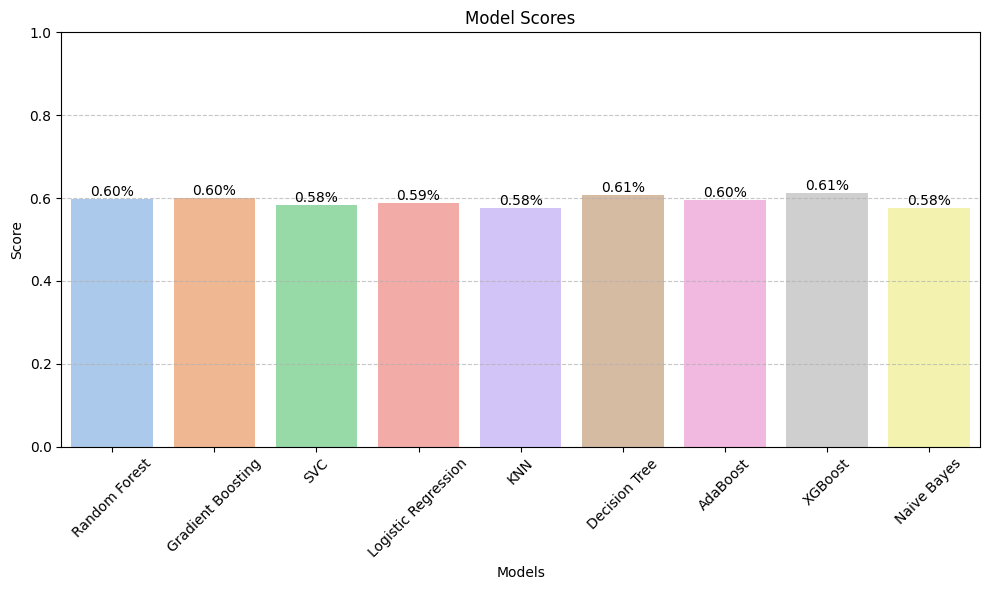

In [ ]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='F1 Score', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


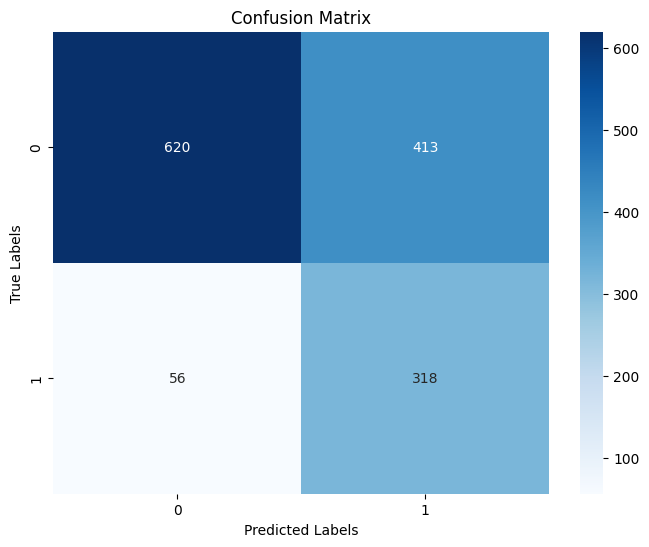

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
import shutil
from google.colab import files

#   Définir le dossier où les images sont générées
image_folder = "/content/"

# Créer une liste de toutes les images générées (formats courants)
image_extensions = (".png", ".jpg", ".jpeg", ".gif", ".bmp")
images = [f for f in os.listdir(image_folder) if f.endswith(image_extensions)]

if images:
    # Créer un dossier temporaire pour stocker les images
    os.makedirs("/content/generated_images", exist_ok=True)

    # Déplacer les images vers ce dossier
    for img in images:
        shutil.move(os.path.join(image_folder, img), "/content/generated_images/" + img)

    # Compresser le dossier contenant les images en ZIP
    shutil.make_archive("/content/images_generated", 'zip', "/content/generated_images")

    # Télécharger le fichier ZIP
    files.download("/content/images_generated.zip")
else:
    print("Aucune image générée n'a été trouvée.")


Aucune image générée n'a été trouvée.
